In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('data/Sentiment.csv')

In [3]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
df.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

<Axes: ylabel='sentiment'>

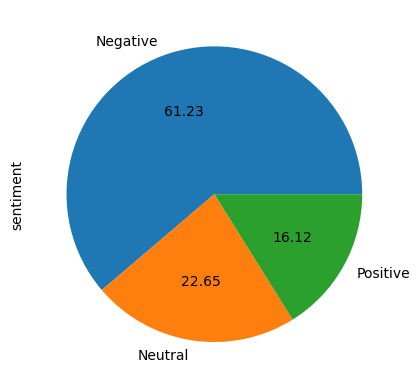

In [5]:
df.sentiment.value_counts().plot.pie(autopct= '%.2f')

In [6]:
df.text[:2]

0    RT @NancyLeeGrahn: How did everyone feel about...
1    RT @ScottWalker: Didn't catch the full #GOPdeb...
Name: text, dtype: object

## Deep learning

In [7]:
df.text= df.text.str.lower()

In [8]:
df.text.head()

0    rt @nancyleegrahn: how did everyone feel about...
1    rt @scottwalker: didn't catch the full #gopdeb...
2    rt @tjmshow: no mention of tamir rice and the ...
3    rt @robgeorge: that carly fiorina is trending ...
4    rt @danscavino: #gopdebate w/ @realdonaldtrump...
Name: text, dtype: object

In [9]:
df.loc[0, 'text']

'rt @nancyleegrahn: how did everyone feel about the climate change question last night? exactly. #gopdebate'

In [13]:
df.text= df.text.str.replace('rt ', '')

In [14]:
import nltk

In [15]:
from nltk.corpus import stopwords

In [16]:
eng_stopwords= list(set(stopwords.words('english')))

In [ ]:
eng_stopwords

In [17]:
def rem_sw(text):
    words= text.split(' ')
    non_stopwords= [word for word in words if word not in eng_stopwords]
    return ' '.join(non_stopwords)

In [18]:
df.text= df.text.apply(lambda x: rem_sw(x))

In [19]:
df.text= df.text.apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

In [20]:
df.text

0        nancyleegrahn everyone feel climate change que...
1        scottwalker catch full gopdebate last night sc...
2        tjmshow mention tamir rice gopdebate held clev...
3        robgeorge carly fiorina trending  hours debate...
4        danscavino gopdebate w realdonaldtrump deliver...
                               ...                        
13866    cappyyarbrough love see men never faced pregna...
13867    georgehenryw thought huckabee exceeded expecta...
13868    lrihendry tedcruz president always tell truth ...
13869    jrehling gopdebate donald trump says time poli...
13870    lrihendry tedcruz headed presidential debates ...
Name: text, Length: 13871, dtype: object

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
#from keras.preprocessing.sequence import pad_sequences

In [22]:
tokenizer= Tokenizer()

In [23]:
tokenizer.fit_on_texts(df.text)

In [24]:
tokenizer.word_index

{'gopdebate': 1,
 'gopdebates': 2,
 'rwsurfergirl': 3,
 'trump': 4,
 'fox': 5,
 'realdonaldtrump': 6,
 'debate': 7,
 'amp': 8,
 'news': 9,
 'last': 10,
 'candidates': 11,
 'gop': 12,
 'like': 13,
 'megynkelly': 14,
 'night': 15,
 'people': 16,
 'foxnews': 17,
 'jeb': 18,
 'bush': 19,
 'one': 20,
 'would': 21,
 'think': 22,
 'im': 23,
 'get': 24,
 'republican': 25,
 'president': 26,
 'god': 27,
 'donald': 28,
 'cruz': 29,
 'need': 30,
 'chris': 31,
 'ask': 32,
 'rubio': 33,
 'want': 34,
 'questions': 35,
 'really': 36,
 'question': 37,
 'said': 38,
 'time': 39,
 'know': 40,
 'carson': 41,
 'next': 42,
 'watching': 43,
 'it': 44,
 'candidate': 45,
 'huckabee': 46,
 'wallace': 47,
 'nights': 48,
 'tedcruz': 49,
 'right': 50,
 'tonight': 51,
 'women': 52,
 'anyone': 53,
 'job': 54,
 'see': 55,
 'fair': 56,
 'us': 57,
 'megyn': 58,
 'trying': 59,
 'say': 60,
 'hear': 61,
 'face': 62,
 'america': 63,
 'tcot': 64,
 'american': 65,
 'cant': 66,
 'balanced': 67,
 'got': 68,
 'go': 69,
 'stage':

In [25]:
x= tokenizer.texts_to_sequences(df.text)

In [27]:
print(df.text[100], len(df.text[100].split(' ')))
print(x[100], len(x[100]))

akbarjenkins maybe gop got piven amp cloward confused pinkard amp bowden she thinks steal cars kevinbaker kevinmkr 17
[7864, 414, 12, 68, 5092, 8, 5093, 1495, 5094, 8, 5095, 1496, 256, 2473, 3936, 5096, 7865] 17


In [28]:
l= []
for i in x:
    l.append(len(i))

(array([4.330e+02, 1.156e+03, 1.701e+03, 5.045e+03, 3.184e+03, 1.618e+03,
        6.880e+02, 3.600e+01, 7.000e+00, 3.000e+00]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

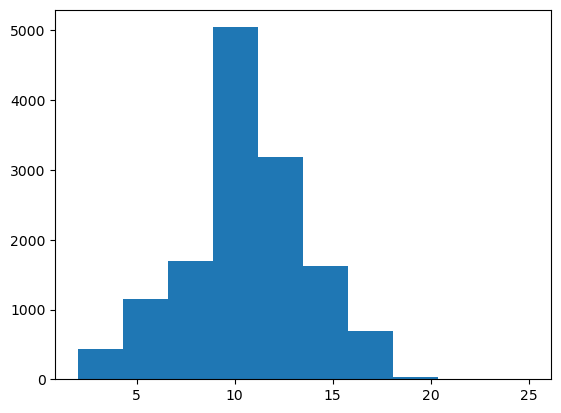

In [29]:
plt.hist(l)

In [30]:
np.quantile(l, [0.25, 0.5,0.75,0.9])

array([ 9., 11., 13., 15.])

In [31]:
x= pad_sequences(x, padding= 'post', maxlen= 14)

In [32]:
x[10]

array([7758,    6, 7759, 3279, 3280, 7760,    0,    0,    0,    0,    0,
          0,    0,    0])

In [33]:
df.text[10]

'jgreendc realdonaldtrump fairness billclinton owns phrasegopdebate'

In [35]:
len(tokenizer.word_index)

19539

In [36]:
x.shape

(13871, 14)

In [39]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df_sentiment= le.fit_transform(df.sentiment)

In [41]:
df.sentiment= le.fit_transform(df.sentiment)

In [43]:
y= to_categorical(df.sentiment)

In [45]:
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

## Model Building

In [42]:
df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,1,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,nancyleegrahn everyone feel climate change que...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,2,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,scottwalker catch full gopdebate last night sc...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,1,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,tjmshow mention tamir rice gopdebate held clev...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,2,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,robgeorge carly fiorina trending hours debate...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,2,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,danscavino gopdebate w realdonaldtrump deliver...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,0,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),cappyyarbrough love see men never faced pregna...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,2,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,georgehenryw thought huckabee exceeded expecta...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,2,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,lrihendry tedcruz president always tell truth ...,NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,0,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),jrehling gopdebate donald trump says time poli...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.utils import to_categorical

In [48]:
model= Sequential([
    Embedding(2000, 128),
    SpatialDropout1D(0.1),
    LSTM(196, dropout = 0.2),
    Dense(3, activation= 'softmax')
])

In [49]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x,y, epochs= 5, validation_split= 0.2, batch_size= 64)

Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.6087 - loss: 0.9163 - val_accuracy: 0.7204 - val_loss: 0.6927
Epoch 2/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7087 - loss: 0.6896 - val_accuracy: 0.6966 - val_loss: 0.6982
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.7352 - loss: 0.6344 - val_accuracy: 0.6854 - val_loss: 0.7136
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7514 - loss: 0.6016 - val_accuracy: 0.6883 - val_loss: 0.7059
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.7671 - loss: 0.5711 - val_accuracy: 0.6901 - val_loss: 0.7545


In [46]:
x.shape[1]

14